In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer

In [51]:
data = pd.read_csv('../data/base.csv', delimiter=",")
data.head()
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fecha                          640 non-null    str    
 1   referencia                     640 non-null    str    
 2   alcalinidad_total              93 non-null     str    
 3   aluminio                       233 non-null    str    
 4   bario                          12 non-null     str    
 5   bicarbonatos                   71 non-null     str    
 6   cadmio                         404 non-null    str    
 7   calcio                         13 non-null     str    
 8   carbonatos                     71 non-null     str    
 9   cianuro_libre                  121 non-null    float64
 10  cloruros                       27 non-null     str    
 11  cobre                          374 non-null    str    
 12  coliformes_termotolerantes     550 non-null    str    
 13  c

In [57]:
# Ajustes de base de datos
# 1. Convertir todo lo posible a numérico, ignorando errores (los vuelve NaN)
cols_a_limpiar = data.columns.drop(['fecha', 'referencia', 'obs'])
for col in cols_a_limpiar:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', '.').str.extract(r'(\d+\.?\d*)')[0], errors='coerce')

# 2. Eliminar columnas con más del 50% de nulos
umbral = len(data) * 0.5
data_fixed = data.copy().dropna(thresh=umbral, axis=1)

data_fixed.head()
data_fixed.info()

<class 'pandas.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fecha                       640 non-null    str    
 1   referencia                  640 non-null    str    
 2   cadmio                      404 non-null    float64
 3   cobre                       374 non-null    float64
 4   coliformes_termotolerantes  530 non-null    float64
 5   coliformes_totales          542 non-null    float64
 6   cromo                       409 non-null    float64
 7   dbo5                        577 non-null    float64
 8   dqo                         611 non-null    float64
 9   hierro                      383 non-null    float64
 10  manganeso                   350 non-null    float64
 11  niquel                      388 non-null    float64
 12  ph                          593 non-null    float64
 13  plomo                       404 non-null    fl

In [ ]:
# 3. Imputar nulos restantes con la mediana (simple y robusto)
# data_fixed = data_fixed.fillna(data.median(numeric_only=True))

# Definimos el imputador (n_neighbors=5 es un buen estándar)
imputer = KNNImputer(n_neighbors=5)

# Seleccionamos solo las columnas numéricas que sobrevivieron a la limpieza
cols_numericas = data_fixed.select_dtypes(include=[np.number]).columns

# Solo aplicamos a las columnas numéricas que decidiste conservar
data_imputed = imputer.fit_transform(data_fixed[cols_numericas])

# Convertimos de nuevo a DataFrame
data_fixed = pd.DataFrame(data_imputed, columns=cols_numericas)
data_fixed['fecha'] = data['fecha']
data_fixed['referencia'] = data['referencia']

data_fixed.head()

,cadmio,cobre,coliformes_termotolerantes,coliformes_totales,cromo,dbo5,dqo,hierro,manganeso,niquel,ph,plomo,solidos_suspendidos,solidos_totales,zinc
0,0.5,1.00,3.0,3.0,2.0,0.68,11.81,1.883,0.05285,4.0,8.20,10.0,41.0,313.0,0.13530
1,0.5,1.00,2.2,7.0,2.0,0.18,23.42,5.179,0.16410,4.0,8.36,10.0,185.0,453.0,0.09056
2,0.5,1.00,7.0,1.7,2.0,0.48,19.68,6.043,0.20470,4.0,8.47,10.0,209.0,470.0,0.09999
3,0.5,1.00,1.1,1.1,2.0,0.58,7.87,3.159,0.09761,4.0,8.34,10.0,74.0,350.0,0.09698
4,0.5,2.89,1.3,1.3,2.0,0.35,7.75,1.093,0.03675,5.2,8.44,10.0,0.0,293.0,0.11720


In [61]:
data_fixed.info()

<class 'pandas.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cadmio                      640 non-null    float64
 1   cobre                       640 non-null    float64
 2   coliformes_termotolerantes  640 non-null    float64
 3   coliformes_totales          640 non-null    float64
 4   cromo                       640 non-null    float64
 5   dbo5                        640 non-null    float64
 6   dqo                         640 non-null    float64
 7   hierro                      640 non-null    float64
 8   manganeso                   640 non-null    float64
 9   niquel                      640 non-null    float64
 10  ph                          640 non-null    float64
 11  plomo                       640 non-null    float64
 12  solidos_suspendidos         640 non-null    float64
 13  solidos_totales             640 non-null    fl

In [62]:
data_fixed.describe()

,cadmio,cobre,coliformes_termotolerantes,coliformes_totales,cromo,dbo5,dqo,hierro,manganeso,niquel,ph,plomo,solidos_suspendidos,solidos_totales,zinc
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,16.412789,48.139164,3.555098,3.700673,239.366849,43.617541,29.661643,20.044042,2.701869,217.540489,7.986397,88.644828,201.082876,259.314082,1.693862
std,28.889761,57.361994,2.149515,2.280998,244.287804,126.286695,74.074895,37.965192,7.786169,182.393447,0.547537,74.341066,235.078847,620.203804,13.499864
min,0.500000,1.000000,1.000000,1.100000,1.020000,0.000000,1.085000,0.003000,0.001000,1.117000,5.480000,1.026000,0.000000,2.164000,0.000800
25%,10.000000,10.000000,1.800000,1.700000,20.000000,1.000000,9.133800,1.888250,0.080000,50.000000,7.724000,50.000000,11.850000,15.216000,0.050000
50%,10.100000,31.850000,3.270000,3.300000,172.600000,3.400000,19.944500,8.380000,0.463000,195.404200,8.100000,64.200000,126.740000,50.088000,0.469840
75%,18.805000,69.630000,4.900000,4.900000,444.343000,14.226000,27.944000,20.436000,1.664000,378.360000,8.352500,100.000000,311.355150,428.600000,1.390305
max,482.800000,569.140000,9.400000,9.400000,989.200000,990.000000,891.000000,394.000000,84.600000,970.400000,9.080000,670.400000,2320.000000,13710.000000,332.000000


<Axes: xlabel='fecha', ylabel='cromo'>

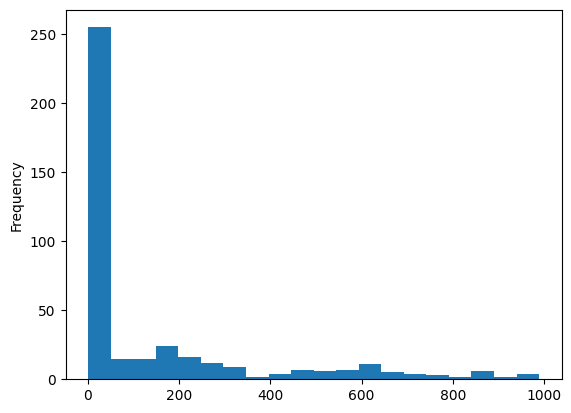

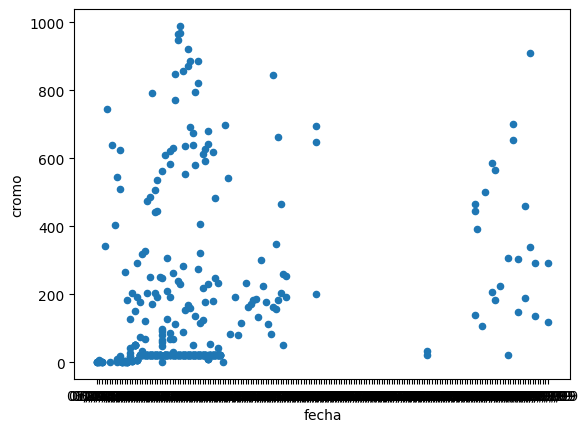

In [47]:
column_name = 'cromo'
data_fixed[column_name].plot(kind="hist", bins=20)
data_fixed.plot(kind="scatter",y=column_name, x="fecha")